# Bike Demand Analysis - Seoul Dataset

Der Datensatz `SeoulBikeData.csv` stammt aus UCIs [Datensatzsammlung](https://archive-beta.ics.uci.edu/).

Dsa Ziel ist, anhand der gegebenen Merkmale im Datensatz, die Anfrage auf Fahrräder zu modellieren.<br>
Es wird die Anzahl der Fahrräder gesucht, die jede STunde verliehen werden (siehe Spalte `Hour`) !


In [190]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [191]:

# Die Datei enthält Zeichen, die nicht im UTF-8-Format codiert sind. Deswegen ich beniutzr encoding.
#df = pd.read_csv("SeoulBikeData.csv", encoding="latin1") 
df = pd.read_csv("SeoulBikeData.csv", encoding="ISO-8859-1") # Alternativ: "cp1252"
df.head(3)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [192]:
df.shape #Anzahl Zeilen und Spalten in DataFrame

(8760, 14)

In [193]:
df.isna().sum()# Überprüfung auf fehlende Werte

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [194]:
# oder so:
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [195]:
df.describe() # allgemeine Info

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [197]:
df.value_counts() # was steht als Werte in DataFrame

Date        Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day
31/12/2017  300                15     3.1             25           3.9               2000              -15.0                      0.90                     0.0           0.0            Winter   Holiday  Yes                1
01/01/2018  61                 5     -4.4             54           0.8               1786              -12.3                      0.00                     0.0           0.0            Winter   Holiday  Yes                1
            62                 4     -4.2             53           1.1               1994              -12.3                      0.00                     0.0           0.0            Winter   Holiday  Yes                1
            65                 6     -4.5             51           1.1               2000              -13.1     

In [198]:
dfc=df.copy()# Erdtellen einer Kopie, um weiter mit dem DF zu arbeiten

In [199]:
# Umwandlung der Datumsspalte in das richtige Format:
dfc["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [200]:
# Kategorische Variablen werden numerische Werte umwandelt
dfc = pd.get_dummies(df, columns=["Seasons", "Holiday", "Functioning Day"], drop_first=True)

In [201]:
# oder so: Umwandlung der kategorischen Spalten in numerische Werte
label_encoder = LabelEncoder()
dfc['Seasons'] = label_encoder.fit_transform(df['Seasons'])
dfc['Holiday'] = label_encoder.fit_transform(df['Holiday'])
dfc['Functioning Day'] = label_encoder.fit_transform(df['Functioning Day'])

In [202]:
dfc.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True,3,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True,3,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,False,True,True,True,3,1,1


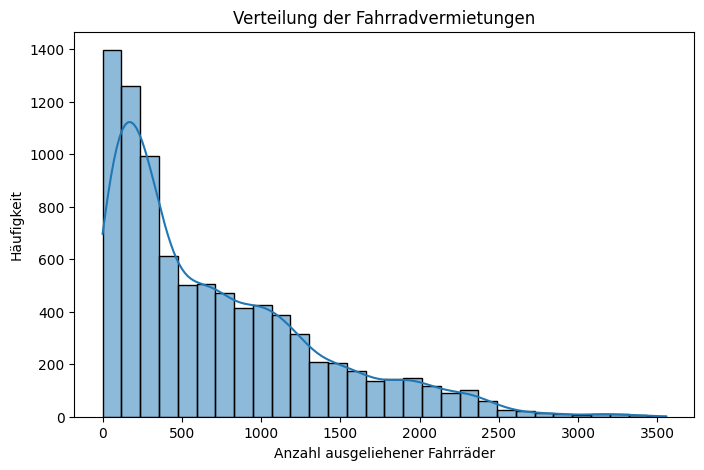

In [203]:
# Histogramm der Anzahl der ausgeliehenen Fahrräder
plt.figure(figsize=(8, 5))
sns.histplot(dfc["Rented Bike Count"], bins=30, kde=True)
plt.title("Verteilung der Fahrradvermietungen")
plt.xlabel("Anzahl ausgeliehener Fahrräder")
plt.ylabel("Häufigkeit")
plt.show()

Das Histogramm zeigt, wie oft eine bestimmte Anzahl an Fahrrädern ausgeliehen wurde.  Es ist nicht symmetrisch. Das bedeutet, dass die Zahl der ausgeliehenen Fahrräder eine Asymmetrie oder Schiefe aufweist.

In [204]:
numerical_df = dfc.select_dtypes(include=[int, float])

# Berechnung der Korrelationsmatrix
correlation_matrix =numerical_df.corr()
print(correlation_matrix)

                           Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
Seasons                            -0.253058 -1.747965e-15        -0.335207   
Holiday                             0.072338  1.2890

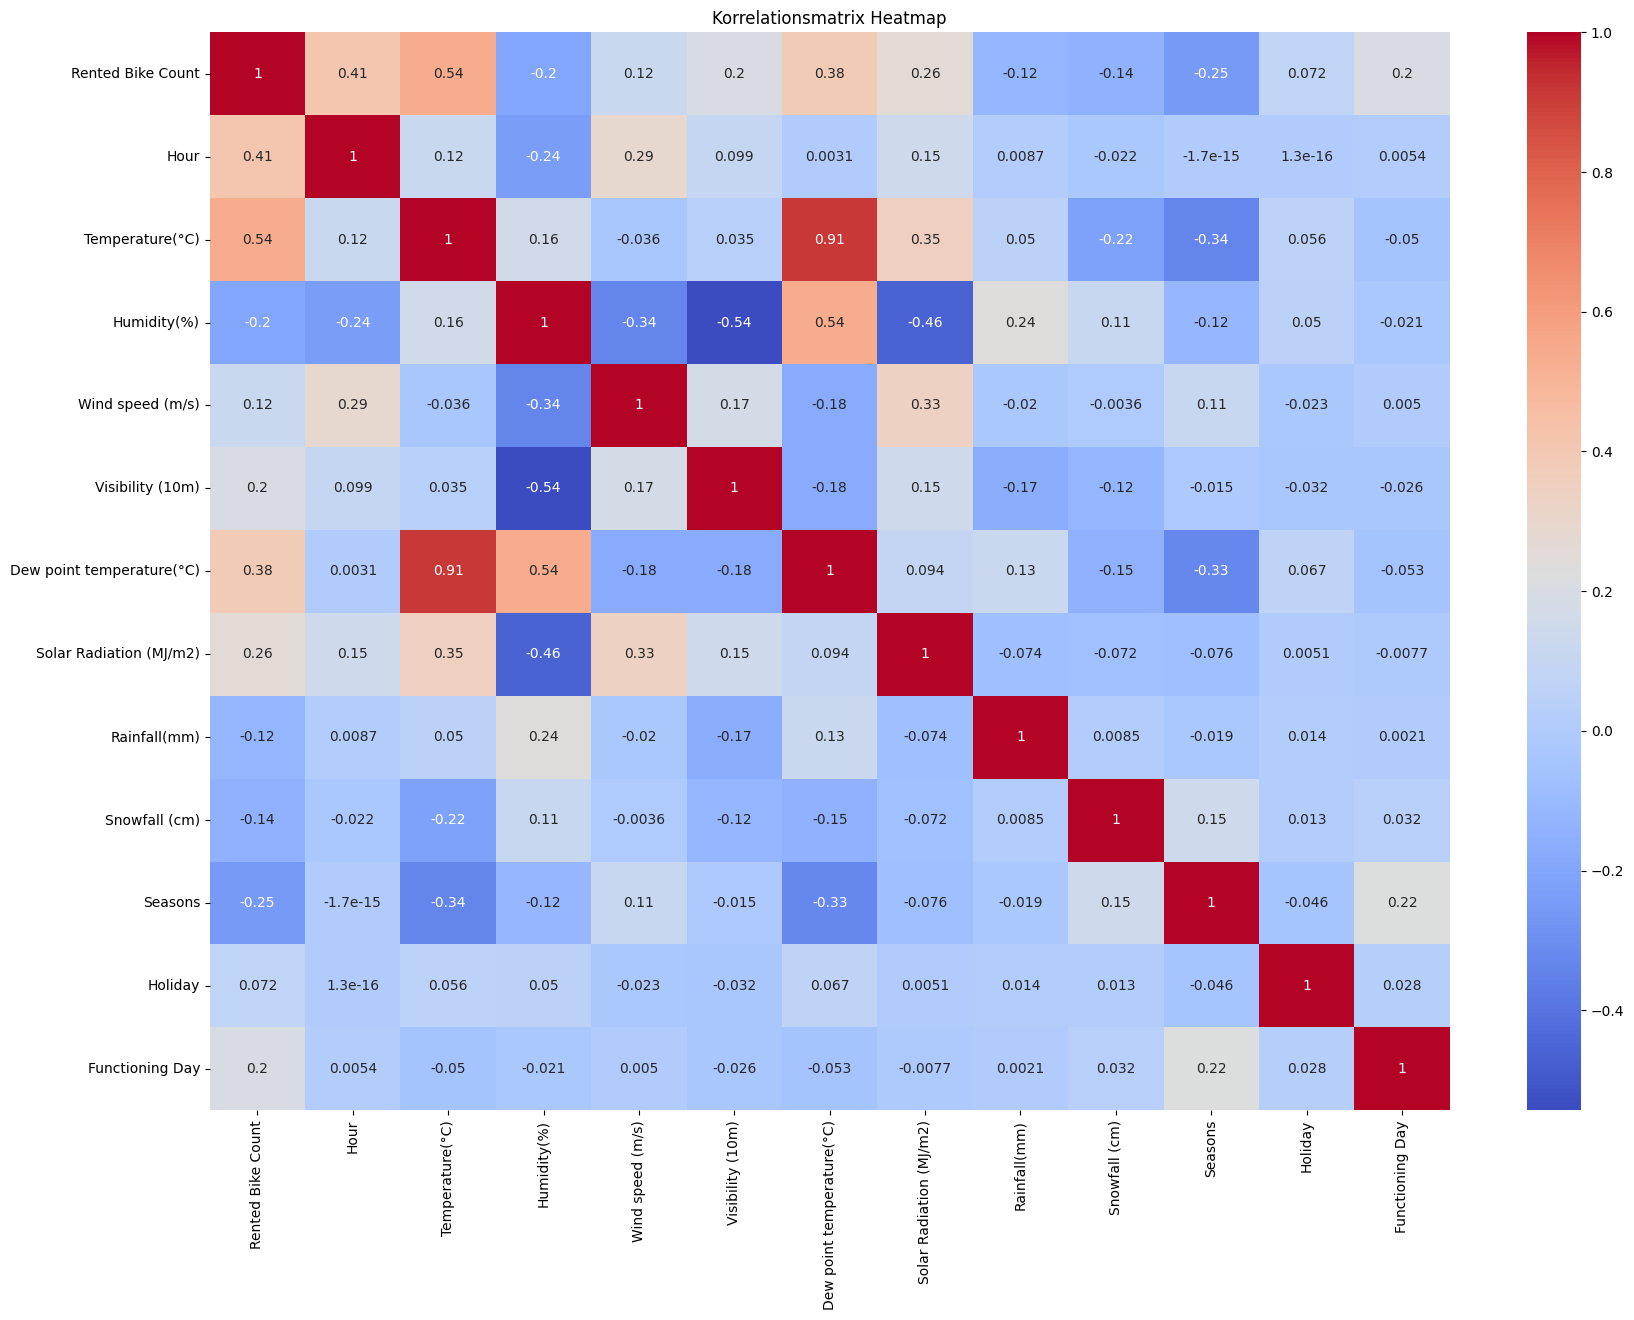

In [205]:
#Visualisierung der Korrelationmatrix
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix Heatmap")
plt.show()

In [206]:
dfc.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [207]:
# Auswahl der Features
features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 
            'Visibility (10m)', 'Dew point temperature(°C)', 
            'Solar Radiation (MJ/m2)', 'Seasons_Winter','Seasons_Spring', 'Seasons_Summer','Functioning Day_Yes', 'Functioning Day']#

X = dfc[features]
#X=dfc.drop(columns=["Rented Bike Count","Date"]) # oder entfernen target und andere unnötige Spalte, in diesem Fall Date, weil Format nicht passt.
y = dfc["Rented Bike Count"] #Target

# Aufteilung der Daten in Trainings- und Testsets (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisieren der Daten  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Erstellen und Training der einfachste linearen Modell
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = model.predict(X_test)

# Modellbewertung
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R²-Score: {r2:.2f}")
print(f'Genauigkeit: {model.score(X_train, y_train)}')

# Interpretation der Ergebnisse
#MAE (Mean Absolute Error): Durchschnittlicher Fehler in der Vorhersage
#MSE (Mean Squared Error): Fehler quadratisch gewichtet
#R²-Score: Zeigt, wie gut das Modell die Daten erklärt (1.0 = perfekt, nahe 0 = schlecht)
#Die Genauigkeit 55 % ist zu niedrig.    


Mean Absolute Error: 334.09
Mean Squared Error: 199240.48
R²-Score: 0.52
Genauigkeit: 0.5420044970021083


In [209]:
# Erstellen und Training des Random Forest Modells:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred_rf = rf_model.predict(X_test)

# Modellbewertung
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R²-Score: {r2_rf:.2f}")
#Das Random Forest Modell funktionirt besser als lineare.


Random Forest - Mean Absolute Error: 152.91
Random Forest - Mean Squared Error: 63669.48
Random Forest - R²-Score: 0.85


### Aufgabenstellung
Erstelle für die Lösung ein neuronales Netz mit `TensorFlow`.<br>
Die erste Schicht erhält die Eingaben (Merkmale) über den Parameter `input_dim`, bei diesem Beispiel ist er eindimensional und entspricht der Anzahl der Merkmale (waring kann ignoriert werden).<br> 
Der letzte Layer enthält nur ein Neuron (Regressionsproblem, es soll ein Wert berechnet werden) und verwendet die `linear` Aktivierungsfunktion (der berechnete Wert soll ausgegeben werden).<br>

Das Modell kann mit folgenden Parametern kompiliert werden `loss='mean_squared_error', optimizer='SGD'`

Ihr könnt versuchen mehr als eine versteckte (hidden) Schicht (layer) anzulegen um das Problem zu lösen.

### Informationen zum Datensatz
Ihr könnt die Zeichenketten in dr Spalte `Date` mit folgender Funktion in ein Datumsobjekt umwandeln:  `pd.to_datetime(df['Date'], format="%d/%m/%Y")`<br>
Daraus kann man dann den Tag, die Woche oder das Jahr extrahieren: 
- `pd.DatetimeIndex(Spalte_mitdatetime_Objekt).day`
- `pd.DatetimeIndex(Spalte_mitdatetime_Objekt).month`
- `pd.DatetimeIndex(Spalte_mitdatetime_Objekt).year`

Die kategorischen Werte (heir Zeichenketten) müssen entsprechend umgewandelt werden, das neuronale Netz kann sonst nichts damit anfangen.<br>

In [210]:
import tensorflow as tf
from tensorflow import keras

In [212]:
X_train.shape

(7008, 11)

In [213]:
# Zielvariable skalieren (sehr wichtig!)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))


1️. Eingabeschicht → 64 Neuronen, nimmt X_train.shape[1] Features als Input

2. Versteckte Schicht → 64 Neuronen, mit ReLU

3. Ausgangsschicht → 1 Neuron, gibt eine Zahl aus

In [214]:
# Modell erstellen
#keras.Sequential erstellt ein stapelbares neuronales Netz
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear')  # Lineare Ausgabe für Regression
])
# 64, 1 - Anzahl Neuronen
# activation='relu'verwendet die ReLU-Funktion, die negative Werte auf 0 setzt. 
# Das hilft, nicht-lineare Zusammenhänge zu lernen
# Modell kompilieren
# input_dim=X_train.shape[1] → Die Anzahl der Eingabe-Features (Spalten in X_train)
model.compile(loss='mean_squared_error', optimizer='RMSprop') # SGD, RMSprop, AdamW, Adam

# Modellübersicht anzeigen
model.summary()


c:\Users\NataliaArchipenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [215]:
# Vorhersagen des Modells auf den Testdaten (X_test) treffen
y_pred_nn_scaled = model.predict(X_test)
# Die Vorhersagen sind skaliert, daher muss man sie mit dem y_scaler in den ursprünglichen Wertebereich zurücktransformieren.
y_pred_nn = y_scaler.inverse_transform(y_pred_nn_scaled)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [216]:
history = model.fit(X_train, y_train_scaled, epochs=200, batch_size=32, validation_data=(X_test, y_test_scaled))
#Das Modell wird 100 Epochen lang trainiert.
#batch_size=32: In jedem Schritt werden 32 Trainingsbeispiele verwendet.
# Während des Trainingsprozesses wird das Modell auch anhand von Testdaten validiert, um die Leistung zu kontrollieren.

Epoch 1/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4559 - val_loss: 0.3315
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2834 - val_loss: 0.2936
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2590 - val_loss: 0.2815
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2529 - val_loss: 0.2653
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2296 - val_loss: 0.2598
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2238 - val_loss: 0.2477
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2203 - val_loss: 0.2400
Epoch 8/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2167 - val_loss: 0.2714
Epoch 9/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2026 - val_loss: 0.2325
Epoch 10/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2047 - val_loss: 0.2221
Epoch 11/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1926 - val_loss: 0.2197
Epoch 12/200
219/219 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Vorhersagen:
y_pred_nn_scaled = model.predict(X_test)
y_pred_nn = y_scaler.inverse_transform(y_pred_nn_scaled)

# Fehler:
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neuronales Netz (Optimiert) - Mean Absolute Error: {mae_nn:.2f}")
print(f"Neuronales Netz (Optimiert) - Mean Squared Error: {mse_nn:.2f}")
print(f"Neuronales Netz (Optimiert) - R²-Score: {r2_nn:.2f}")
#R**2-Score -> zu 1 ist gut. 
#100 Epoch 0,83 , 500 - 0.82(aber Overfitting), 200 - 0.84

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Neuronales Netz (Optimiert) - Mean Absolute Error: 169.41
Neuronales Netz (Optimiert) - Mean Squared Error: 67569.12
Neuronales Netz (Optimiert) - R²-Score: 0.84


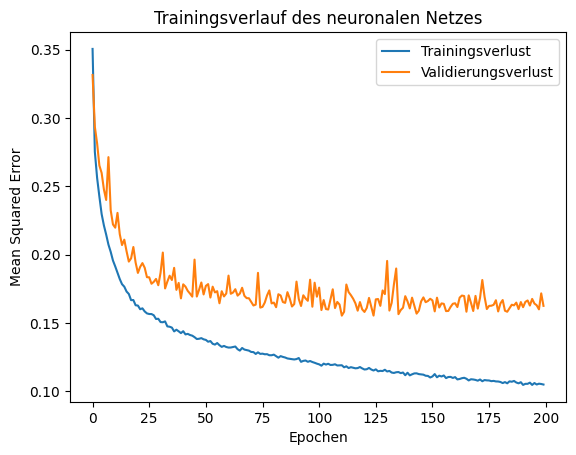

In [218]:
# Trainings- und Validierungsverlust plotten
plt.plot(history.history['loss'], label='Trainingsverlust')
plt.plot(history.history['val_loss'], label='Validierungsverlust')
plt.xlabel('Epochen')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Trainingsverlauf des neuronalen Netzes')
plt.show()

# beide Linien gehen nach unten und dann stabilisieren sich. Das bedeutet, dass es keine Overfitting gibt.


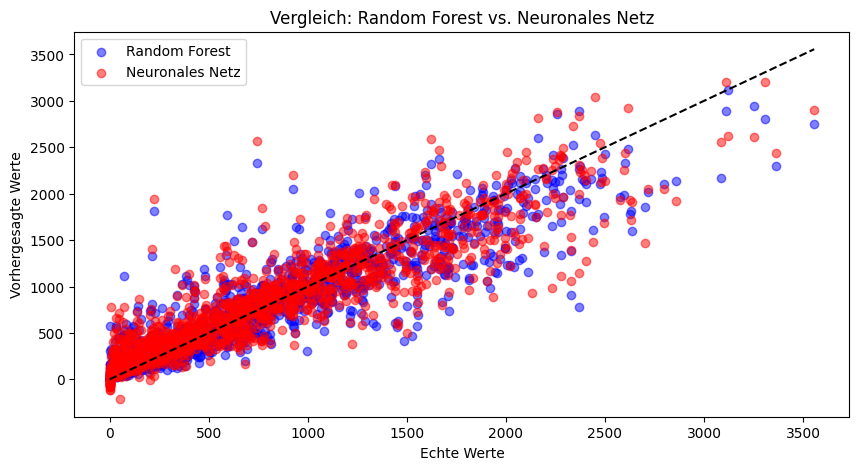

In [219]:
import numpy as np

# Random Forest Vorhersagen
y_pred_rf = rf_model.predict(X_test)

# Scatter-Plot für echte vs. vorhergesagte Werte
plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest", color='blue')
plt.scatter(y_test, y_pred_nn, alpha=0.5, label="Neuronales Netz", color='red')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')  # Diagonale Linie (Perfekte Vorhersage)
plt.xlabel("Echte Werte")
plt.ylabel("Vorhergesagte Werte")
plt.legend()
plt.title("Vergleich: Random Forest vs. Neuronales Netz")
plt.show()
#Neuriónales Netz funktioniert ein bischen besser als RF


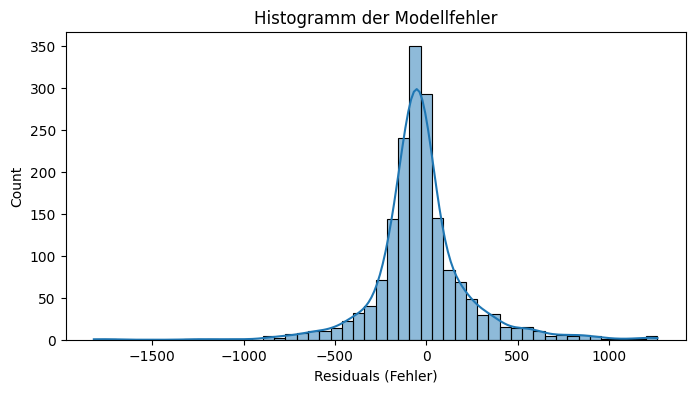

In [220]:
import seaborn as sns

residuals = y_test - y_pred_nn.flatten()  # Fehler berechnen

plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals (Fehler)")
plt.title("Histogramm der Modellfehler")
plt.show()


Das Histogramm zeigt, wie die Fehler des Modells verteilt sind. Das Modell ist gut, weil die Residuen symmetrisch um 0 liegen.